In [538]:
%pip install pandas numpy
#!pip install regressormetricgraphplot
#%pip install regressioncomparemetricplot
#!pip install -q dtreeviz
#from CompareModels import *
#from regressioncomparemetricplot import CompareModels
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline
import pandas as pd
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [539]:
dataframe = pd.read_csv('d:/Downloads/TADPOLE_D1_D2.csv')

C:\Users\Master\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3397: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,

In [540]:
print(dataframe.head())

   RID        PTID VISCODE  SITE  D1  D2 COLPROT ORIGPROT   EXAMDATE DX_bl  \
0    3  011_S_0003      bl    11   1   0   ADNI1    ADNI1  9/12/2005    AD   
1    3  011_S_0003     m06    11   1   0   ADNI1    ADNI1  3/13/2006    AD   
2    3  011_S_0003     m12    11   1   0   ADNI1    ADNI1  9/12/2006    AD   
3    3  011_S_0003     m24    11   1   0   ADNI1    ADNI1  9/12/2007    AD   
4    4  022_S_0004      bl    22   1   0   ADNI1    ADNI1  11/8/2005  LMCI   

   ...  PHASE_UPENNBIOMK9_04_19_17  BATCH_UPENNBIOMK9_04_19_17  \
0  ...                       ADNI1                 UPENNBIOMK9   
1  ...                                                           
2  ...                       ADNI1                 UPENNBIOMK9   
3  ...                                                           
4  ...                       ADNI1                 UPENNBIOMK9   

  KIT_UPENNBIOMK9_04_19_17  STDS_UPENNBIOMK9_04_19_17  \
0            P06-MP02-MP01            P06-MP02-MP01/2   
1                   

In [541]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB
None


In [542]:
dataframe_subset = dataframe[['Ventricles', 'Hippocampus', 'WholeBrain','Fusiform', 'Entorhinal', 'MidTemp','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting' ,'FDG','AGE','PTEDUCAT','APOE4','PTGENDER','MMSE']]
dataframe_subset.head()

,Ventricles,Hippocampus,WholeBrain,Fusiform,Entorhinal,MidTemp,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FDG,AGE,PTEDUCAT,APOE4,PTGENDER,MMSE
0,84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,Male,20.0
1,88580.0,5446.0,1100060.0,14400.0,2427.0,16972.0,19.0,2.0,6.0,100.0000,1.06360,81.3,18,1.0,Male,24.0
2,90099.0,5157.0,1095640.0,14617.0,1596.0,17330.0,31.0,2.0,7.0,100.0000,1.10384,81.3,18,1.0,Male,17.0
3,97420.0,5139.0,1088560.0,14033.0,1175.0,16398.0,23.0,1.0,5.0,100.0000,1.03871,81.3,18,1.0,Male,19.0
4,39605.0,6869.0,1154980.0,19036.0,3983.0,19615.0,37.0,7.0,4.0,36.3636,NaN,67.5,10,0.0,Male,27.0


In [543]:
dataframe_subset=dataframe_subset.replace(np.nan,0)

In [544]:
dataframe_subset= pd.get_dummies(dataframe_subset, columns = ['PTGENDER'])
print(dataframe_subset)


       Ventricles  Hippocampus  WholeBrain  Fusiform  Entorhinal  MidTemp  \
0         84599.0       5319.0   1129830.0   15506.0      1791.0  18422.0   
1         88580.0       5446.0   1100060.0   14400.0      2427.0  16972.0   
2         90099.0       5157.0   1095640.0   14617.0      1596.0  17330.0   
3         97420.0       5139.0   1088560.0   14033.0      1175.0  16398.0   
4         39605.0       6869.0   1154980.0   19036.0      3983.0  19615.0   
...           ...          ...         ...       ...         ...      ...   
12735         0.0          0.0         0.0       0.0         0.0      0.0   
12736         0.0          0.0         0.0       0.0         0.0      0.0   
12737         0.0          0.0         0.0       0.0         0.0      0.0   
12738         0.0          0.0         0.0       0.0         0.0      0.0   
12739         0.0          0.0         0.0       0.0         0.0      0.0   

       RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  \
0              

In [545]:
import scipy.stats as stats
stats.zscore(dataframe_subset)

,Ventricles,Hippocampus,WholeBrain,Fusiform,Entorhinal,MidTemp,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FDG,AGE,PTEDUCAT,APOE4,MMSE,PTGENDER_Female,PTGENDER_Male
0,2.194140,0.507305,1.033304,0.772405,0.023230,0.879963,-0.097167,-0.598629,0.374338,1.400404,1.436013,1.073441,0.710892,0.706383,0.107681,-0.874941,0.874941
1,2.339773,0.544074,0.974064,0.646788,0.373329,0.732851,-0.250803,-0.264146,1.071214,1.400404,1.385501,1.073441,0.710892,0.706383,0.424763,-0.874941,0.874941
2,2.395342,0.460403,0.965268,0.671435,-0.084112,0.769173,0.363744,-0.264146,1.419652,1.400404,1.460256,1.073441,0.710892,0.706383,-0.130131,-0.874941,0.874941
3,2.663160,0.455191,0.951179,0.605106,-0.315860,0.674616,-0.045954,-0.598629,0.722776,1.400404,1.339263,1.073441,0.710892,0.706383,0.028410,-0.874941,0.874941
4,0.548161,0.956062,1.083351,1.173333,1.229861,1.001000,0.671017,1.408265,0.374338,-0.108646,-0.590364,-0.905603,-2.116255,-0.818667,0.662574,-0.874941,0.874941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,-0.900676,-1.032657,-1.214995,-0.988725,-0.962662,-0.989061,-1.223836,-0.933111,-1.019413,-0.970959,-0.590364,-0.618785,0.004105,0.706383,-0.605754,1.142935,-1.142935
12736,-0.900676,-1.032657,-1.214995,-0.988725,-0.962662,-0.989061,0.722230,0.070336,0.722776,0.214722,-0.590364,-2.124578,0.004105,-0.818667,0.662574,-0.874941,0.874941
12737,-0.900676,-1.032657,-1.214995,-0.988725,-0.962662,-0.989061,0.261319,-0.264146,1.419652,1.400404,-0.590364,1.360258,-1.409468,-0.818667,0.662574,1.142935,-1.142935
12738,-0.900676,-1.032657,-1.214995,-0.988725,-0.962662,-0.989061,0.722230,0.070336,-0.670975,-0.707474,-0.590364,-0.833898,0.004105,-0.818667,0.741845,1.142935,-1.142935


In [546]:
dataframe_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ventricles             12740 non-null  float64
 1   Hippocampus            12740 non-null  float64
 2   WholeBrain             12740 non-null  float64
 3   Fusiform               12740 non-null  float64
 4   Entorhinal             12740 non-null  float64
 5   MidTemp                12740 non-null  float64
 6   RAVLT_immediate        12740 non-null  float64
 7   RAVLT_learning         12740 non-null  float64
 8   RAVLT_forgetting       12740 non-null  float64
 9   RAVLT_perc_forgetting  12740 non-null  float64
 10  FDG                    12740 non-null  float64
 11  AGE                    12740 non-null  float64
 12  PTEDUCAT               12740 non-null  int64  
 13  APOE4                  12740 non-null  float64
 14  MMSE                   12740 non-null  float64
 15  PT

In [547]:
x=dataframe_subset.drop(['MMSE'],axis=1).values
y=dataframe_subset['MMSE'].values

In [548]:
print(x)

[[8.45990e+04 5.31900e+03 1.12983e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [8.85800e+04 5.44600e+03 1.10006e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [9.00990e+04 5.15700e+03 1.09564e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  1.00000e+00]]


In [549]:
print(y)

[20. 24. 17. ... 27. 28. 26.]


In [550]:
from sklearn.svm import LinearSVC
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x)
X_new.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(12740, 14)

In [551]:
dataframe_subset.head()

,Ventricles,Hippocampus,WholeBrain,Fusiform,Entorhinal,MidTemp,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FDG,AGE,PTEDUCAT,APOE4,MMSE,PTGENDER_Female,PTGENDER_Male
0,84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,20.0,0,1
1,88580.0,5446.0,1100060.0,14400.0,2427.0,16972.0,19.0,2.0,6.0,100.0000,1.06360,81.3,18,1.0,24.0,0,1
2,90099.0,5157.0,1095640.0,14617.0,1596.0,17330.0,31.0,2.0,7.0,100.0000,1.10384,81.3,18,1.0,17.0,0,1
3,97420.0,5139.0,1088560.0,14033.0,1175.0,16398.0,23.0,1.0,5.0,100.0000,1.03871,81.3,18,1.0,19.0,0,1
4,39605.0,6869.0,1154980.0,19036.0,3983.0,19615.0,37.0,7.0,4.0,36.3636,0.00000,67.5,10,0.0,27.0,0,1


In [552]:
dataframe_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ventricles             12740 non-null  float64
 1   Hippocampus            12740 non-null  float64
 2   WholeBrain             12740 non-null  float64
 3   Fusiform               12740 non-null  float64
 4   Entorhinal             12740 non-null  float64
 5   MidTemp                12740 non-null  float64
 6   RAVLT_immediate        12740 non-null  float64
 7   RAVLT_learning         12740 non-null  float64
 8   RAVLT_forgetting       12740 non-null  float64
 9   RAVLT_perc_forgetting  12740 non-null  float64
 10  FDG                    12740 non-null  float64
 11  AGE                    12740 non-null  float64
 12  PTEDUCAT               12740 non-null  int64  
 13  APOE4                  12740 non-null  float64
 14  MMSE                   12740 non-null  float64
 15  PT

In [553]:
print(x)

[[8.45990e+04 5.31900e+03 1.12983e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [8.85800e+04 5.44600e+03 1.10006e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [9.00990e+04 5.15700e+03 1.09564e+06 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  1.00000e+00]]


In [554]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [555]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
x_train.shape, x_test.shape,y_test.shape

((8918, 16), (3822, 16), (3822,))

In [556]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(x_train, np.ravel(y_train,order='C'))
sel_.get_support()
x_train = pd.DataFrame(x_train)
print(x_train)

           0       1          2        3       4        5     6     7     8   \
0     69010.0     0.0   890715.0      0.0     0.0      0.0  31.0   4.0   8.0   
1         0.0     0.0        0.0      0.0     0.0      0.0  47.0  11.0   7.0   
2         0.0     0.0        0.0      0.0     0.0      0.0   0.0   0.0   0.0   
3     45375.0  5700.0   916581.0  13352.0  2066.0  13737.0  18.0   1.0   4.0   
4     39706.0     0.0   961157.0  17948.0  3403.0  20420.0   0.0   0.0   0.0   
...       ...     ...        ...      ...     ...      ...   ...   ...   ...   
8913  65243.0  5622.0   906268.0  16242.0  3098.0  15768.0  17.0   1.0   2.0   
8914  38128.0  7980.0  1138230.0  23297.0  3998.0  23653.0  29.0   3.0   5.0   
8915  56118.0  6148.0   956610.0      0.0     0.0      0.0  42.0   3.0  11.0   
8916      0.0  5646.0        0.0      0.0     0.0      0.0  50.0  10.0   4.0   
8917  19090.0  6545.0   923836.0  12051.0  3588.0  14891.0  34.0   4.0   3.0   

            9         10    11    12   

In [557]:
selected_feat = x_train.columns[(sel_.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 16
selected features: 16
features with coefficients shrank to zero: 56


<AxesSubplot:>

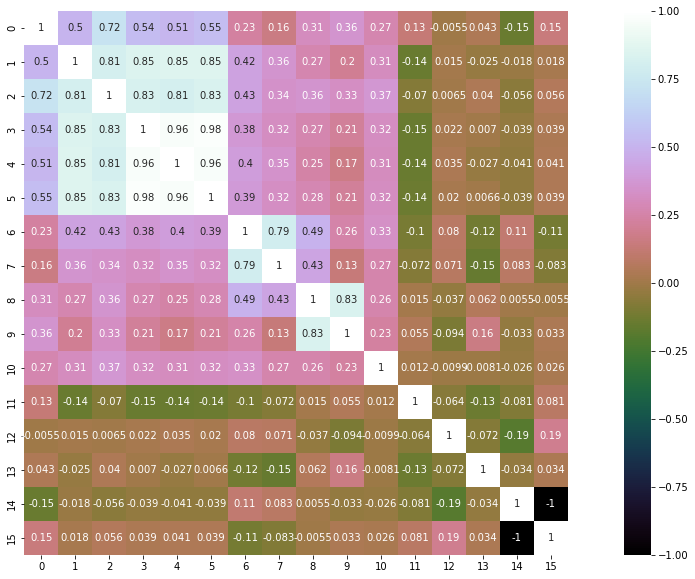

In [558]:
corr_mat=x_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [559]:
from sklearn.linear_model import Lasso
m1=Lasso()
m1.fit(x_train,y_train)

Lasso()

In [560]:
y_pred=m1.predict(x_test)
print(y_pred)

[28.75686449 30.36865402 27.95337799 ...  1.81334008 20.70756676
 26.06683201]


In [561]:

m1.predict([[84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,0,1]])


array([24.654823])

In [586]:
from sklearn.metrics import r2_score
r3=r2_score(y_test,y_pred)
print(r3)

0.8650779257923205


Text(0.5, 1.0, 'Actual vs. Predicted')

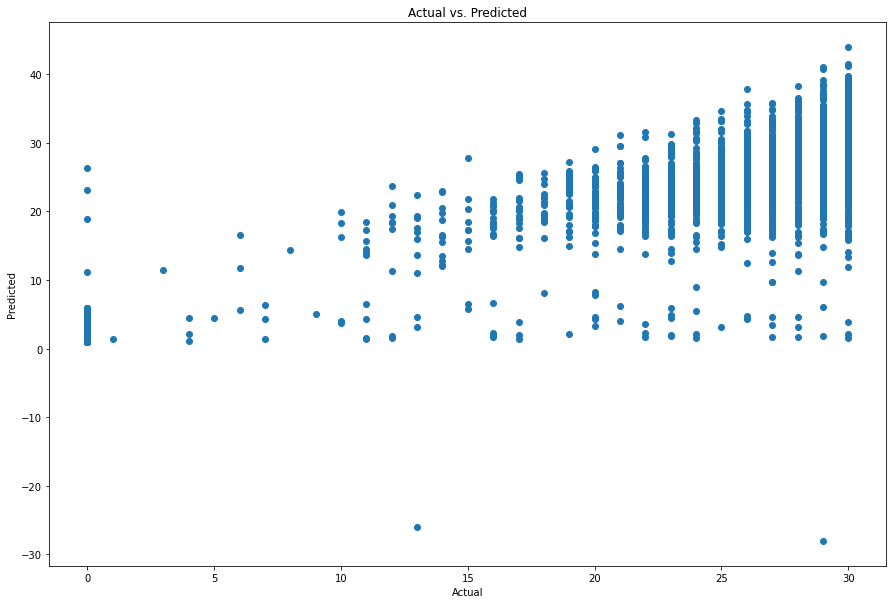

In [563]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [564]:
#CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)

In [565]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [566]:
y_pred1=model.predict(x_test)
print(y_pred1)

[28.66546545 29.9998011  26.66328787 ...  0.9299712  20.80589939
 25.79978804]


In [567]:
model.predict([[84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,0,1]])
model.predict([[84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,0,1]])


array([25.51009969])

In [587]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred1)
print(r2)

0.872477134062572


In [569]:
# import the regressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [570]:

y_pred2 = regressor.predict([[84599.0,5319.0,1129830.0,15506.0,1791.0,18422.0,22.0,1.0,4.0,100.0000,1.09079,81.3,18,1.0,0,1]])
y_pred3 = regressor.predict([[88580.0,5446.0,1100060.0,14400.0,2427.0,16972.0,19.0,2.0,6.0,100.0000,1.06360,81.3,18,1.0,0,1]])
y_pred4 = regressor.predict([[90099.0,5157.0,1095640.0,14617.0,1596.0,17330.0,31.0,2.0,7.0,100.0000,1.10384,81.3,18,1.0,0,1]])
print("Predicted price: % d\n"% y_pred2)
print("Predicted price: % d\n"% y_pred3)
print("Predicted price: % d\n"% y_pred4)


Predicted price:  20

Predicted price:  24

Predicted price:  17



In [571]:
y_pred123=regressor.predict(x_test)

Text(0.5, 1.0, 'Actual vs. Predicted')

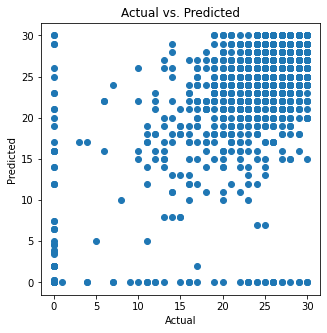

In [572]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred123)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

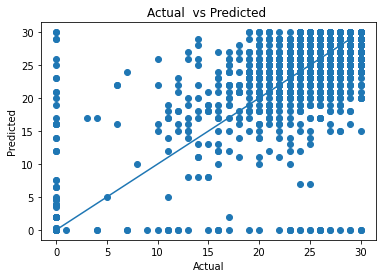

In [573]:
plt.scatter(y_test, y_pred123)
plt.plot(range(30), range(30))

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual  vs Predicted ")

plt.show()

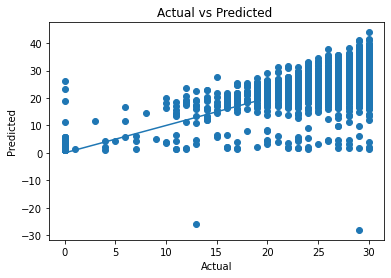

In [574]:
plt.scatter(y_test, y_pred)
plt.plot(range(20), range(20))

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ")

plt.show()

In [589]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,y_pred123)
print(r1)

0.9069769515046533


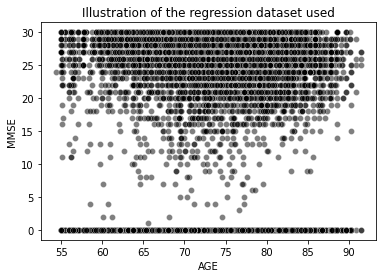

In [576]:
import seaborn as sns
feature_name = "AGE"
target_name = "MMSE"

sns.scatterplot(data=dataframe_subset, x=feature_name, y=target_name,
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

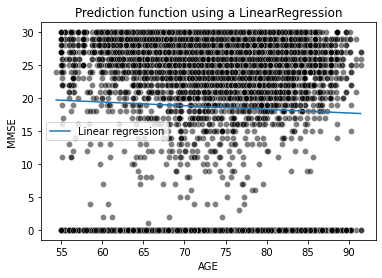

In [577]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)
data_train, target_train = dataframe_subset[[feature_name]], dataframe_subset[target_name]
#target_predicted = linear_model.predict(data_test)
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),data_train[feature_name].max()),columns=[feature_name])                                          
sns.scatterplot(data=dataframe_subset, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")


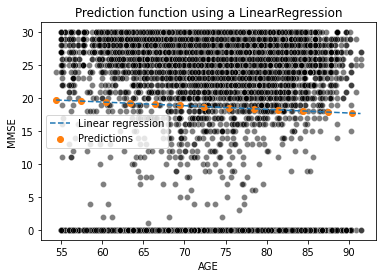

In [578]:
ax = sns.scatterplot(data=dataframe_subset, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

In [579]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

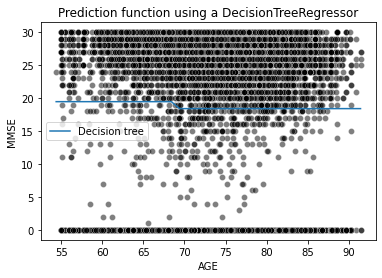

In [580]:
sns.scatterplot(data=dataframe_subset, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

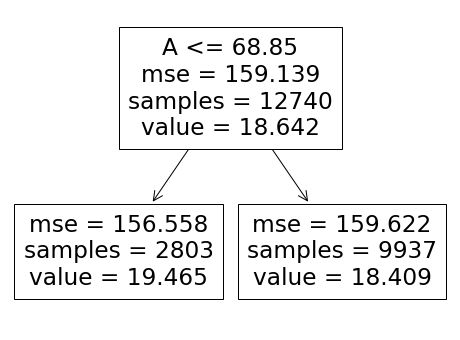

In [581]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=feature_name, ax=ax)

In [582]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

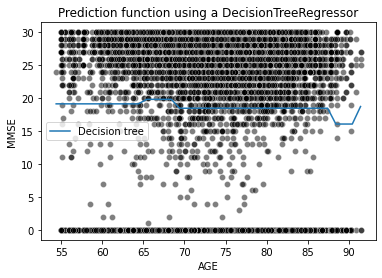

In [583]:
sns.scatterplot(data=dataframe_subset, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

In [590]:
#y_Train=list(y_train)
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import r2_score
r4=r2_score(y_test,y_predict)
print(r4)


0.8724765141018811


In [600]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_test)
#y1_knn=list(y1_knn)

from sklearn.metrics import r2_score
r5=r2_score(y_test,y1_knn)
print(r5)


0.6314733801969847


In [601]:
Accuracy=[r1,r2,r3,r4,r5]
#test_error=[test_error_ridge,test_error_knn,test_error_lasso,test_error_tree,test_error_svm]

col={'Accuracy':Accuracy}
models=['DT','LineaRegression','lasso','Ridge','knn','']
df=DataFrame(data=col,index=models)
df

,Accuracy
DT,0.906977
LineaRegression,0.872477
lasso,0.865078
Ridge,0.872477
knn,0.631473


<AxesSubplot:>

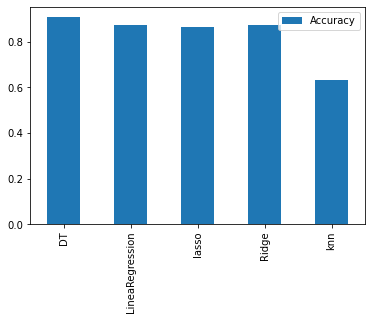

In [602]:
df.plot(kind='bar')

In [ ]:
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_test)
#y1_svm=list(y1_svm)
#y2_svm=svm_reg.predict(x_test)
#y2_svm=list(y2_svm)

from sklearn.metrics import r2_score
r6=r2_score(y_test,y1_svm)
print(r6)
